#Lista 1
-------------


Objetivo: treinar um modelo de classificação utilizando o modelo de regressão Logística e árvore de decisão.


Banco utilizado: Detecção de doenças no fígado.


[Link](https://drive.google.com/file/d/1jnLwuv4e_ZeCqluMXs3Mar2TGetumtVv/view?usp=drive_link) para o banco


Descrição do banco:
> Este banco contém registro de 416 pacientes diagnosticados com doença no fígado e 167 pacientes sem. Esta informação está na coluna Selector.
>
> Há 10 variáveis no banco:
>
> * age: idade
> * Gender: gênero do paciente
> * TB: Bilirrubina total
> * DB: Bilirrubina direta
> * Alkphos: fosfatase alcalina.
> * Sgpt: transaminase glutâmico-pirúvica sérica (TGP)
> * Sgot: transaminase glutâmico-oxalacética sérica (TGO)
> * TP: Proteína total
> * ALB: Albumina
> * A/G Ratio: Relação Albumina:Globulina


Exercício:


1. Carregue o banco de dados e analise suas features. Transforme a feature sexo em uma variavel dummy.
2. Separe o banco em 80% para treino e 20% para teste.
3. Treine um modelo de regressão logística.
  3.1 Interprete dois coeficientes.
4. Treine um modelo de árvore de decisão. Utilize max_depth de 4.
  4.1 Quais são as duas features mais importantes?
5. Construa um relatório dos dois modelos.
  5.1 Tomando como decisão a precisão para detectar doença no fígado qual é o melhor modelo?


 5.2 Tomando como decisão o f1 score do rótulo de pacientes com doença no fígado qual é o melhor modelo?


Obs.: Utilize o **mesmo** banco de treino e de teste para construir e avaliar os dois modelos.

##1. Carga do banco
--------------------

In [252]:
import pandas as pd
import numpy as np
df = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        583 non-null    int64  
 1   Gender     583 non-null    object 
 2   TB         583 non-null    float64
 3   DB         583 non-null    float64
 4   Alkphos    583 non-null    int64  
 5   Sgpt       583 non-null    int64  
 6   Sgot       583 non-null    int64  
 7   TP         583 non-null    float64
 8   ALB        583 non-null    float64
 9   A/G Ratio  579 non-null    float64
 10  Selector   583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [254]:
df.isna().sum()

Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
A/G Ratio    4
Selector     0
dtype: int64

In [255]:
df = df.dropna()

In [256]:
df['Selector'].value_counts()

1    414
2    165
Name: Selector, dtype: int64

In [257]:
# transformando selector em 0 e 1   
df['Selector'] = df['Selector'].map({1:0, 2:1})

In [258]:
# dummies sexo
df = pd.get_dummies(df , columns=['Gender'], drop_first=True)

In [259]:
df.head()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,0,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0,1


##2. Quebra do banco
--------------------

In [260]:
from sklearn.model_selection import train_test_split
X = df.drop('Selector', axis=1)
Y = df['Selector']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=15)

##3. Primeiro modelo
--------------------

In [261]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='none')
model.fit(X_train, Y_train)

C:\Users\Lucia\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.

C:\Users\Lucia\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(penalty='none')

In [262]:
pd.DataFrame(model.coef_.T, index=X_train.columns) # coeficientes do modelo de regressão logística 

,0
Age,-0.005940
TB,-0.006590
DB,-0.562112
Alkphos,-0.001161
Sgpt,-0.010644
Sgot,-0.001263
TP,-0.206288
ALB,0.400462
A/G Ratio,0.299505
Gender_Male,-0.120409


##3.1 Interpretação de dois coeficientes
--------------------

In [263]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay
Y_pred = model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.86        88
           1       0.50      0.18      0.26        28

    accuracy                           0.76       116
   macro avg       0.64      0.56      0.56       116
weighted avg       0.71      0.76      0.71       116


In [264]:
confusion_matrix(Y_test, Y_pred)

array([[83,  5],
       [23,  5]], dtype=int64)

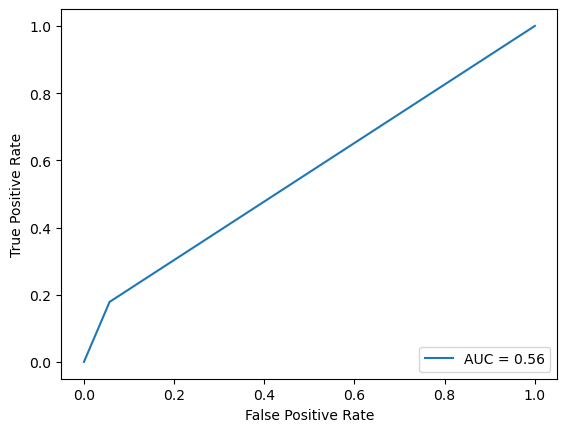

In [265]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, Y_pred)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

In [266]:
from sklearn.metrics import accuracy_score,precision_score,f1_score
import plotly.express as px

predict_proba = model.predict_proba(X_test)[:, 1]

f1_lista = []
precision_lista = []
for thr in np.arange(0, 1, .01):
    f1_lista.append(f1_score(Y_test, predict_proba >= thr))
    precision_lista.append(precision_score(Y_test, predict_proba >= thr))


C:\Users\Lucia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Lucia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Lucia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Lucia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Lucia\anaconda3\Lib\site-pa

In [267]:
px.line(x=np.arange(0, 1, .01), y=f1_lista, labels={'x':'Threshold', 'y':'F1 Score'})

In [268]:
print(classification_report(Y_test, predict_proba >= .31))

              precision    recall  f1-score   support

           0       0.92      0.67      0.78        88
           1       0.44      0.82      0.57        28

    accuracy                           0.71       116
   macro avg       0.68      0.75      0.68       116
weighted avg       0.81      0.71      0.73       116


In [269]:
px.line(x=np.arange(0, 1, .01), y=precision_lista, labels={'x':'Threshold', 'y':'Precision'})

In [270]:
print(classification_report(Y_test, predict_proba >= .49))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        88
           1       0.55      0.21      0.31        28

    accuracy                           0.77       116
   macro avg       0.67      0.58      0.58       116
weighted avg       0.73      0.77      0.73       116


##4. Segundo modelo
--------------------

In [271]:
# árvore de decisão 
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4,random_state=15)
model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=4, random_state=15)

##4.1 Duas features mais importantes
--------------------

In [272]:
pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=['importance']).sort_values(by='importance', ascending=False).head(2)

,importance
TB,0.418267
Sgpt,0.215344


##5. Avaliação do modelo
--------------------

In [273]:
Y_pred = model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86        88
           1       0.50      0.14      0.22        28

    accuracy                           0.76       116
   macro avg       0.64      0.55      0.54       116
weighted avg       0.71      0.76      0.70       116


In [274]:
predict_proba = model.predict_proba(X_test)
predict_proba

array([[1.        , 0.        ],
       [0.51977401, 0.48022599],
       [0.75      , 0.25      ],
       [0.75438596, 0.24561404],
       [0.51977401, 0.48022599],
       [0.75438596, 0.24561404],
       [0.51977401, 0.48022599],
       [1.        , 0.        ],
       [0.75438596, 0.24561404],
       [0.51977401, 0.48022599],
       [0.75438596, 0.24561404],
       [0.75438596, 0.24561404],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.51977401, 0.48022599],
       [0.51977401, 0.48022599],
       [0.90909091, 0.09090909],
       [1.        , 0.        ],
       [0.75438596, 0.24561404],
       [0.51977401, 0.48022599],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.51977401, 0.48022599],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.75438596, 0.24561404],
       [1.        , 0.        ],
       [1.

In [275]:

predict_proba = model.predict_proba(X_test)[:, 1]

f1_lista = []
precision_lista = []
for thr in np.arange(0, 1, .01):
    f1_lista.append(f1_score(Y_test, predict_proba>=thr))
    precision_lista.append(precision_score(Y_test, predict_proba>=thr))



C:\Users\Lucia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Lucia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Lucia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Lucia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Lucia\anaconda3\Lib\site-pa

In [276]:
px.line(x=np.arange(0, 1, .01), y=precision_lista, labels={'x':'Threshold', 'y':'Precision'})

In [277]:
print(classification_report(Y_test, predict_proba >= .73))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87        88
           1       0.75      0.11      0.19        28

    accuracy                           0.78       116
   macro avg       0.76      0.55      0.53       116
weighted avg       0.77      0.78      0.71       116


In [278]:
px.line(x=np.arange(0, 1, .01), y=f1_lista, labels={'x':'Threshold', 'y':'F1 Score'})

In [279]:
print(classification_report(Y_test, predict_proba >= .15))

              precision    recall  f1-score   support

           0       0.89      0.55      0.68        88
           1       0.35      0.79      0.49        28

    accuracy                           0.60       116
   macro avg       0.62      0.67      0.58       116
weighted avg       0.76      0.60      0.63       116


##5.1 Qual modelo escolhido olhando para a precisão de detecção de doença no fígado?
--------------------
Olhando para os resultados ótimos dos modelos:
- Regressão Logística: Threshold de 0.49
- Árvore de Decisão: Threshold de 0.73
- A precisão da Regressão Logística é de 0.55 e da Árvore de Decisão é de 0.75
- O modelo escolhido é a Árvore de Decisão

##5.2 Qual modelo escolhido olhando para o f1-score do rótulo de doença do fígado?
--------------------
Olhando para os resultados ótimos dos modelos onde 1 é o rótulo de doença no fígado:
- Regressão Logística: Threshold de 0.31
- Árvore de Decisão: Threshold de 0.15
- O f1-score da Regressão Logística é de 0.57 e da Árvore de Decisão é de 0.49
- O modelo escolhido é a Regressão Logística